<a href="https://colab.research.google.com/github/Nohbdy100/twitter-data-analysis/blob/main/Advanced_Data_Analytics_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

twitter_stock = pd.read_csv("twitter-stocks.csv")
twitter_stock = twitter_stock.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)
twitter_stock["Date"] = pd.to_datetime(twitter_stock["Date"])
twitter_stock = twitter_stock.set_index("Date")

active_users = pd.read_csv("twitter-active-users.csv")
active_users = active_users.drop(['Unnamed: 0'], axis=1)

users_emotion = pd.read_csv("twitter-emotion.csv")
users_emotion = users_emotion.drop(['Unnamed: 0', 'text'], axis=1)
emotion_index = {0: "Sadness", 1: "Joy", 2: "Love", 3: "Anger", 4: "Fear", 5: "Suprise"}
users_emotion['emotion'] = users_emotion['label'].map(emotion_index)

elon_tweets = pd.read_csv("ElonTweets.csv")
elon_tweets = elon_tweets.drop(["Unnamed: 0.1", "Unnamed: 0", "Datetime", "Tweet Id",
                                "Text", "Username", "location", "reply count",
                                "retweet count", "like count", "language",
                                "Twitter Access Point", " Friends Count", "verified",
                                "mentions"], axis=1)
elon_tweets['sentiment_result'] = elon_tweets['sentiment'].str.extract(r"'(.*?)'")
elon_tweets["Date"] = pd.to_datetime(elon_tweets["Date"])
elon_tweets_modified = elon_tweets.loc[:, ['Date', 'sentiment_result']]
grouped_tweets = elon_tweets_modified.groupby(elon_tweets_modified.Date.dt.year)["sentiment_result"].value_counts()

twitter_reviews_raw = pd.read_csv("TWITTER_REVIEWS.csv")
twitter_reviews = twitter_reviews_raw.loc[:, ['review_timestamp', 'review_rating']]
twitter_reviews['review_timestamp'] = pd.to_datetime(twitter_reviews['review_timestamp'])
twitter_reviews = twitter_reviews.loc[twitter_reviews['review_timestamp'].dt.year >= 2022]

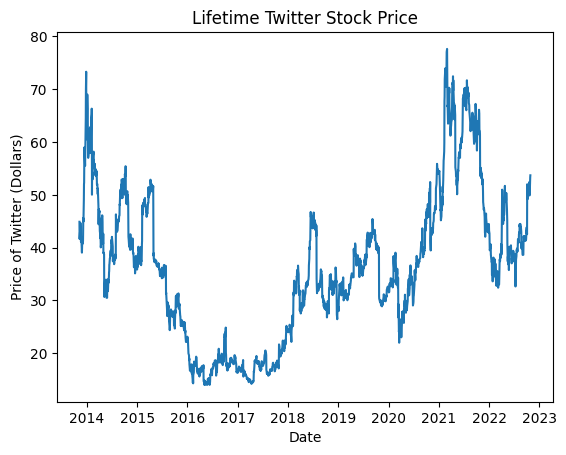

In [ ]:
twitter_stock_ax = twitter_stock.Close

fig, ax = plt.subplots()
ax.plot(twitter_stock_ax)

ax.set_xlabel("Date")
ax.set_ylabel("Price of Twitter (Dollars)")
ax.set_title("Lifetime Twitter Stock Price")

plt.show()

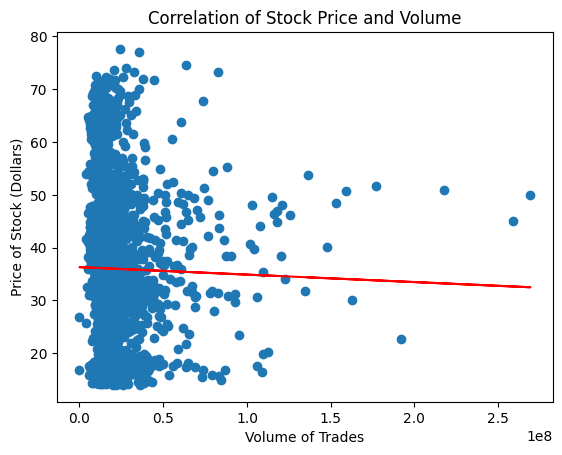

In [ ]:
scatter_y = twitter_stock.Close
scatter_x = twitter_stock.Volume

z = np.polyfit(scatter_x, scatter_y, 1)
p = np.poly1d(z)

fig1, ax1 = plt.subplots()
ax1.scatter(scatter_x, scatter_y)
ax1.plot(scatter_x, p(scatter_x), "r")

ax1.set_xlabel("Volume of Trades")
ax1.set_ylabel("Price of Stock (Dollars)")
ax1.set_title("Correlation of Stock Price and Volume")

plt.show()

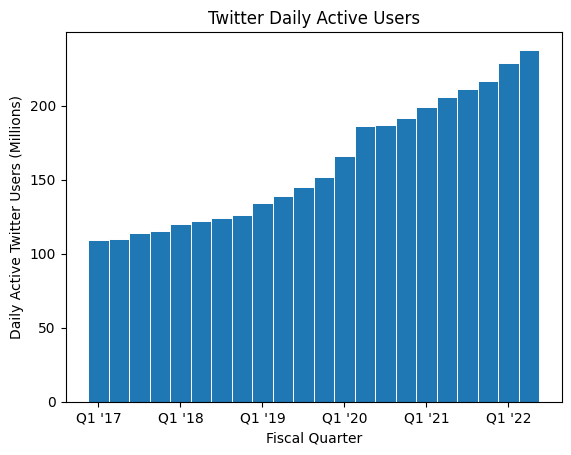

In [ ]:
bar_x = active_users.quarter
bar_height = active_users.mDAU

fig2, ax2 = plt.subplots()
ax2.bar(bar_x, bar_height, width=1, edgecolor="white", linewidth=0.7)

ax2.set_xlabel("Fiscal Quarter")
ax2.set_ylabel("Daily Active Twitter Users (Millions)")
ax2.set_title("Twitter Daily Active Users")
ax2.xaxis.set_major_locator(plt.MaxNLocator(7))

plt.show()

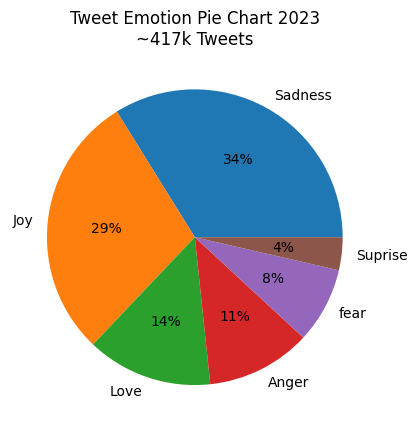

In [ ]:
pie_x = users_emotion.value_counts()
pie_labels = ["Sadness", "Joy", "Love", "Anger", "fear", "Suprise"]

fig3, ax3 = plt.subplots()
ax3.pie(pie_x, labels=pie_labels, autopct='%1.0f%%')

ax3.set_title("Tweet Emotion Pie Chart 2023\n~417k Tweets")

plt.show()

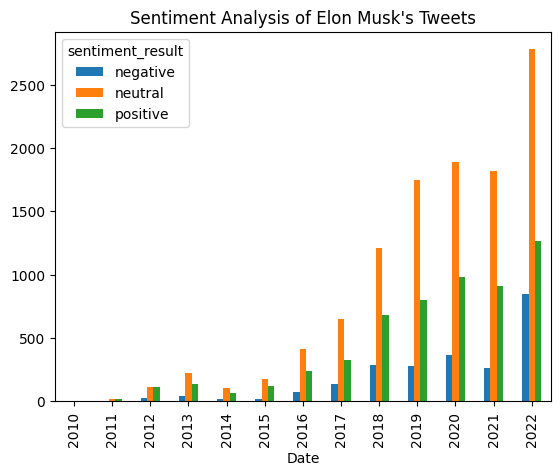

In [ ]:
unstacked = grouped_tweets.unstack(level=1)
unstacked.plot.bar(title="Sentiment Analysis of Elon Musk's Tweets")

plt.show()

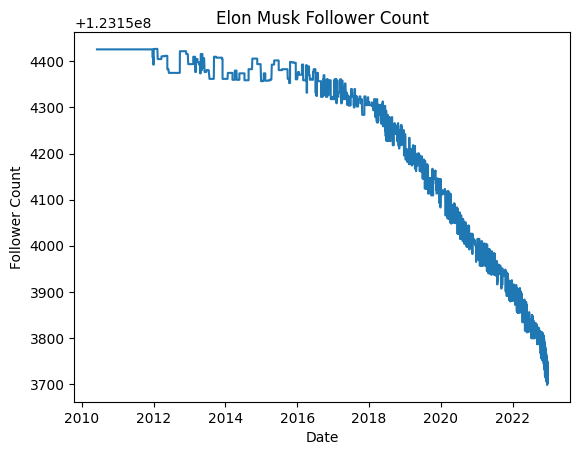

In [ ]:
fig4, ax4 = plt.subplots()
ax4.plot(elon_tweets['Date'], elon_tweets['Follower Count'])

ax4.set_title("Elon Musk Follower Count")
ax4.set_xlabel("Date")
ax4.set_ylabel("Follower Count")

plt.show()

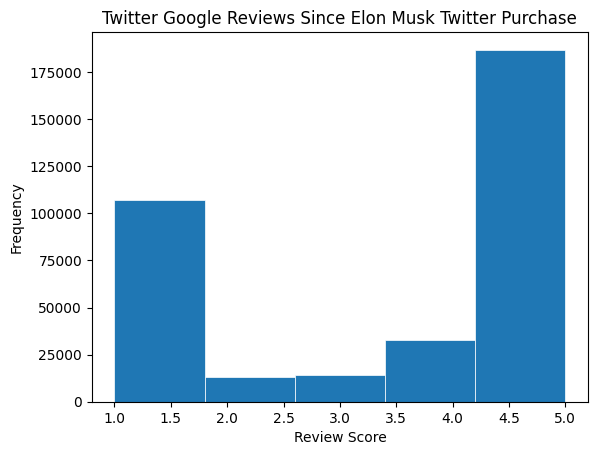

In [ ]:
fig5, ax5 = plt.subplots()
ax5.hist(twitter_reviews['review_rating'], bins=5, linewidth=0.5, edgecolor="white")

ax5.set_title("Twitter Google Reviews Since Elon Musk Twitter Purchase")
ax5.set_xlabel("Review Score")
ax5.set_ylabel("Frequency")

plt.show()